In [ ]:
# Package import
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
import seaborn as sns
from tensorflow.keras.applications import ResNet50
import warnings
# Ignore all warnings (not recommended for production code)
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",module="tensorflow")
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.
Classes list :  ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Classes:  {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
x_train shape: (1435, 256, 256, 3)
y_train shape: (1435, 4)
x_test shape: (1435, 256, 256, 3)
y_test shape: (1435, 4)


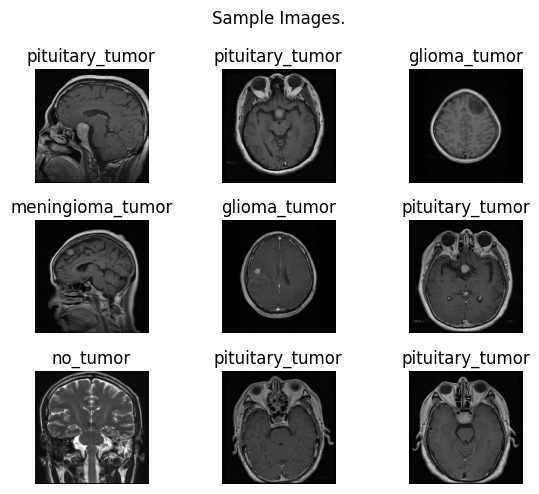

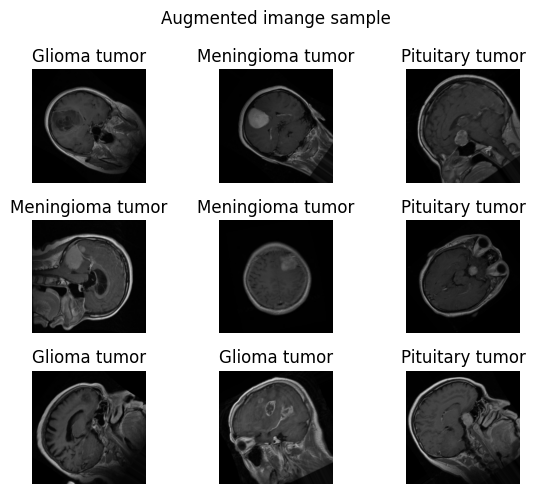

In [ ]:
# pre_proccesing file as Custom module
from drive.MyDrive.ColabNotebooks.Final_Copy import pre_Proccesing
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import trainingModel
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import evaluatePerfomanceOfModel
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import modelPerformance
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import modelPrediction

In [ ]:
# Splited Dataset into x_train, y_train, x_test, y_test
x_train = pre_Proccesing.x_train
y_train = pre_Proccesing.y_train
x_test  = pre_Proccesing.x_test
y_test  = pre_Proccesing.y_test

In [ ]:
# Create a sequential model
sq_model_RCNN = Sequential([
    ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
sq_model_RCNN.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 23,850,500
Trainable params: 23,797,380
Non

In [ ]:
optimizer     = 'adam'
loss_function = 'categorical_crossentropy'
metrics_acc   = ['accuracy']
epochs = 10

# Compiling and training CNN model
history_RCNN = trainingModel(sq_model_RCNN,optimizer,loss_function, metrics_acc,x_train,y_train,x_test,y_test, epochs)

Epoch 1/10
45/45 [==============================] - 85s 610ms/step - loss: 1.0639 - accuracy: 0.6411 - val_loss: 570.2556 - val_accuracy: 0.3101
Epoch 2/10
45/45 [==============================] - 21s 477ms/step - loss: 0.6781 - accuracy: 0.7436 - val_loss: 1.5089 - val_accuracy: 0.2836
Epoch 3/10
45/45 [==============================] - 22s 481ms/step - loss: 0.5514 - accuracy: 0.7854 - val_loss: 2.5686 - val_accuracy: 0.2836
Epoch 4/10
45/45 [==============================] - 22s 481ms/step - loss: 0.4246 - accuracy: 0.8537 - val_loss: 6.8210 - val_accuracy: 0.3101
Epoch 5/10
45/45 [==============================] - 22s 487ms/step - loss: 0.3856 - accuracy: 0.8690 - val_loss: 4.8831 - val_accuracy: 0.1261
Epoch 6/10
45/45 [==============================] - 22s 487ms/step - loss: 0.3425 - accuracy: 0.8753 - val_loss: 2.1131 - val_accuracy: 0.3101
Epoch 7/10
45/45 [==============================] - 22s 486ms/step - loss: 0.2362 - accuracy: 0.9282 - val_loss: 1.6005 - val_accuracy: 0.28

CNN model Test Loss:  2.7281057834625244
CNN model Test Accuracy 0.12613239884376526


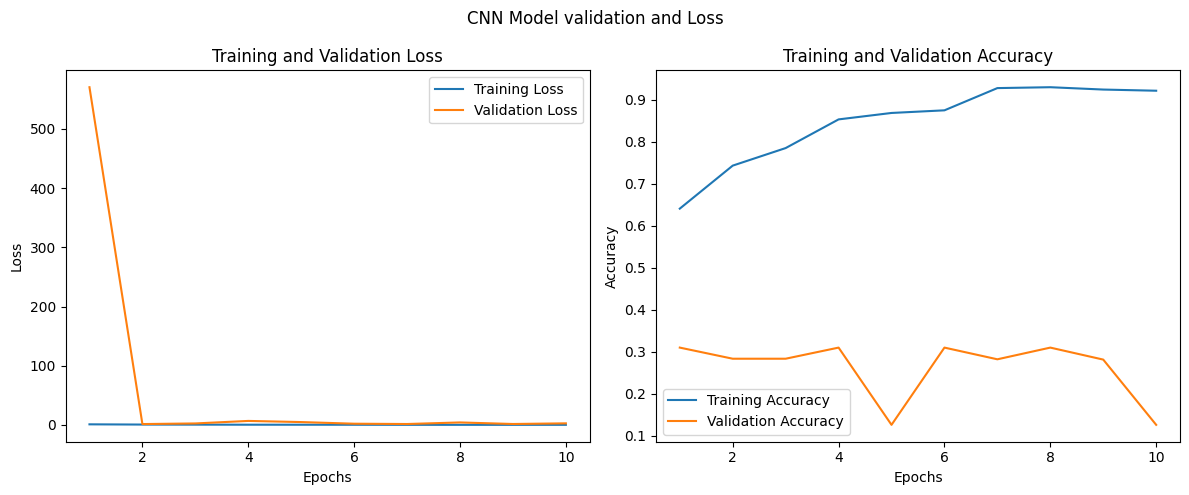

In [ ]:
# evaluating result from a CNN model Test Loss and Accuracy of Model
evaluatePerfomanceOfModel(sq_model_RCNN, x_test, y_test,epochs,history_RCNN)

45/45 [==============================] - 6s 109ms/step


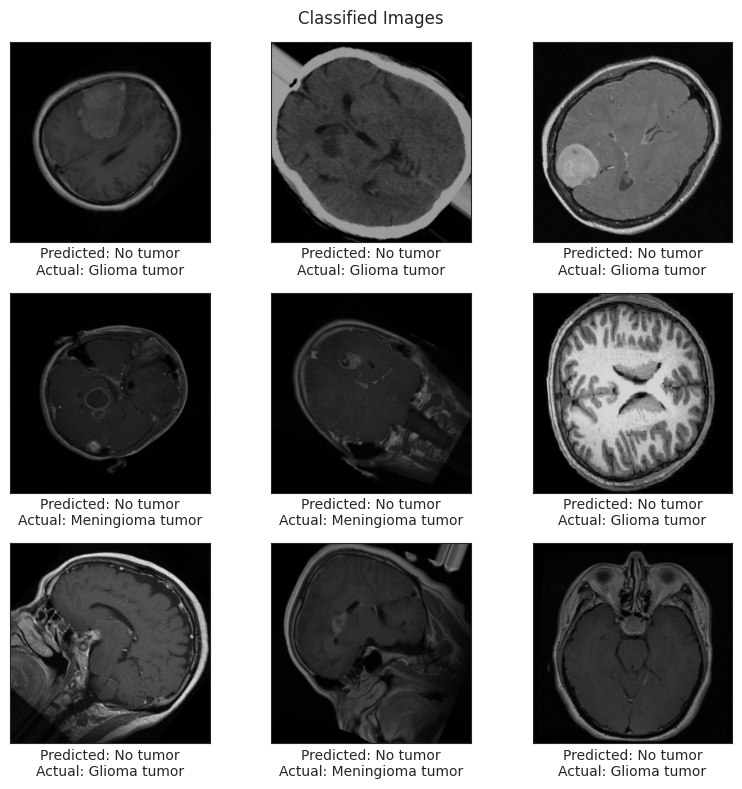

In [ ]:
# Prediction using CNN model
modelPrediction(sq_model_RCNN,x_test, y_test)

45/45 [==============================] - 5s 109ms/step
                  precision    recall  f1-score   support

    Glioma tumor       0.00      0.00      0.00       445
Meningioma tumor       0.00      0.00      0.00       407
        No tumor       0.13      1.00      0.22       181
 Pituitary tumor       0.00      0.00      0.00       402

        accuracy                           0.13      1435
       macro avg       0.03      0.25      0.06      1435
    weighted avg       0.02      0.13      0.03      1435



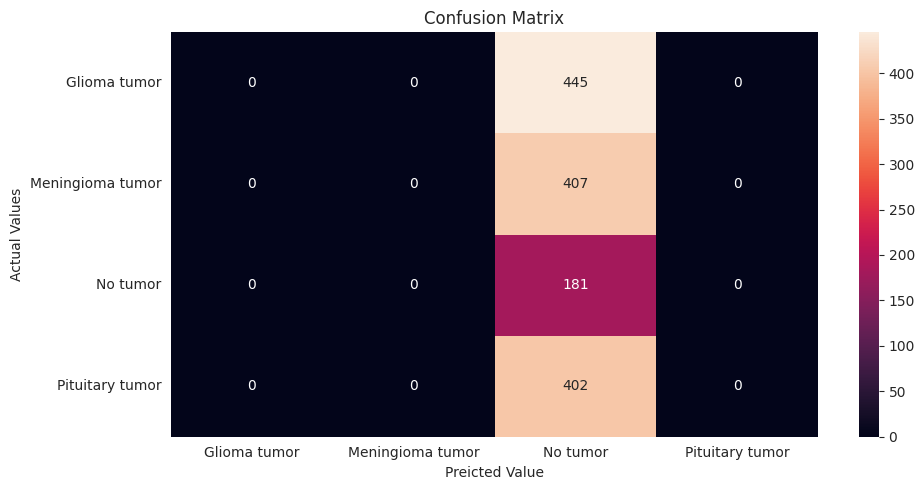

In [ ]:
# Permomance of the model confusion metrix
modelPerformance(sq_model_RCNN, x_test, y_test)